In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *

In [2]:
def gaussian(x,mu,var):
    return np.exp(-(x-mu)**2/(2*var))/(np.sqrt(2*np.pi*np.sqrt(var)))

In [3]:
a=np.random.normal(50, 10, 1000)
b=np.random.normal(100, 25, 800)
c=np.append(a,b)

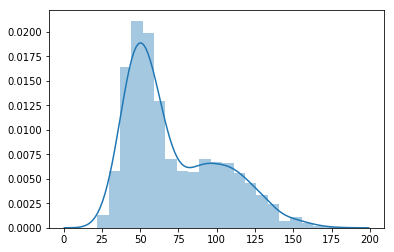

In [4]:
sns.distplot(c)

In [5]:
#Parameters initalised
mu1=30
mu2=50
var1=200
var2=500

In [6]:
loglik=[]

In [7]:
for i in range(20):
    #E Step
    t1=gaussian(c,mu1,var1)
    t2=gaussian(c,mu2,var2)
    summ=t1+t2
    t1=t1/summ
    t2=t2/summ
    
    #M Step
    mu1=np.sum(t1*c)/np.sum(t1)
    mu2=np.sum(t2*c)/np.sum(t2)
    var1=np.sum(t1*(c-mu1)**2)/np.sum(t1)
    var2=np.sum(t2*(c-mu2)**2)/np.sum(t2)
    
    loglik.append(np.sum(np.log(gaussian(c,mu1,var1)*t1+gaussian(c,mu1,var1)*t2)))

Text(0.5, 0, 'Number of iterations')

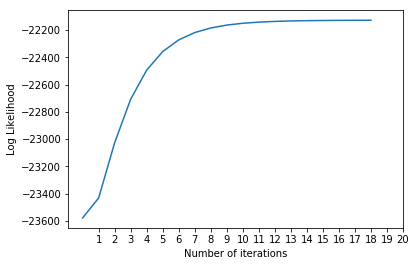

In [14]:
plt.plot(loglik[1:])
plt.xticks(np.linspace(1,20,20))
plt.ylabel('Log Likelihood')
plt.xlabel('Number of iterations')

In [10]:
print('Mu1:',round(mu1,2),', Std1:',round(np.sqrt(var1),2),', Mix Percentage:',round(sum(t1)/len(t1),2))
print('Mu2:',round(mu2,2),', Std2:',round(np.sqrt(var2),2),', Mix Percentage:',round(sum(t2)/len(t2),2))

Mu1: 48.5 , Std1: 8.35 , Mix Percentage: 0.4
Mu2: 86.45 , Std2: 30.07 , Mix Percentage: 0.6


In [11]:
pie1=round(sum(t1)/len(t1),2)
pie2=round(sum(t2)/len(t2),2)

In [12]:
rv1 = multivariate_normal(mean = mu1, cov =var1)
rv2 = multivariate_normal(mean = mu2, cov =var2)

Text(0, 0.5, 'PDF')

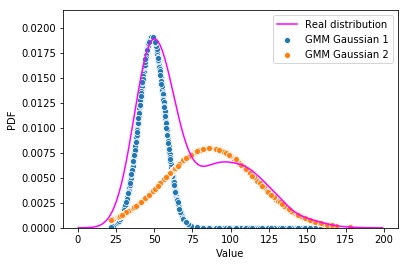

In [13]:
sns.scatterplot(c,rv1.pdf(c)*pie1,label='GMM Gaussian 1')
sns.scatterplot(c,rv2.pdf(c)*pie2,label='GMM Gaussian 2')
sns.kdeplot(c,label='Real distribution',color='magenta')
plt.xlabel('Value')
plt.ylabel('PDF')